In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlparse

In [2]:
base_directory = "/Users/barnabykempster/code/zulu-tango/news_and_echo_bubbles/raw_data"

In [22]:
data_left = pd.read_csv(f"{base_directory}/braindedleft.csv")
data_left.head()

,Unnamed: 0,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity
0,0,https://kindest.com/442355-defend-democracy-to...,NaN,"Defend Democracy Today: Support Fearless, Insi...",[],"While the election has come and gone, the figh...","['reporting', 'come', 'today', 'access', 'chec...",set(),0.8612,0.063,0.819,0.118,0.165589,0.539782
1,1,https://www.alternet.org/2021/03/dan-crenshaw/,2021-03-22 10:17:36+00:00,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162
2,2,https://www.alternet.org/2021/03/rep-dan-crens...,2021-03-09 13:32:36+00:00,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766
3,3,https://www.alternet.org/2020/11/dan-crenshaw/,2020-11-23 12:14:56+00:00,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912
4,4,https://www.alternet.org/2019/05/rep-dan-crens...,2019-05-06 17:40:27+00:00,Rep. Dan Crenshaw gets cornered on The View fo...,"['Travis Gettys', 'Raw Story']",Rep. Dan Crenshaw (R-TX) appeared on “The View...,"['words', 'view', 'offering', 'think', 'omar',...",{'Religious right'},-0.4810,0.077,0.848,0.075,0.045094,0.453717


In [4]:
data_right = pd.read_csv(f"{base_directory}/braindedright.csv")

In [5]:
#import right-wing news dataset
brainded_right = pd.read_csv(f'{base_directory}/braindedright.csv')
#convert date+time column into separate columns
brainded_right[['pdate','time']] = brainded_right['pdate'].str.split(' ', n=1, expand=True)
brainded_right['pdate'] = pd.to_datetime(brainded_right['pdate'])

In [53]:
brainded_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           1650 non-null   int64         
 1   index             1650 non-null   int64         
 2   Unnamed: 0        1650 non-null   int64         
 3   link              1650 non-null   object        
 4   pdate             1650 non-null   datetime64[ns]
 5   title             1650 non-null   object        
 6   author            1650 non-null   object        
 7   text              1650 non-null   object        
 8   keywords          1650 non-null   object        
 9   tags              1650 non-null   object        
 10  compound          1650 non-null   float64       
 11  neg               1650 non-null   float64       
 12  neu               1650 non-null   float64       
 13  pos               1650 non-null   float64       
 14  polarity          1650 n

In [6]:
mask = brainded_right['pdate'] > '2020-01-01'
brainded_right = brainded_right[mask].reset_index()

In [7]:
# import left-wing news dataset
brainded_left = pd.read_csv(f'{base_directory}/braindedleft.csv')
brainded_left[['pdate','time']] = brainded_left['pdate'].str.split(' ', n=1, expand=True)
brainded_left['pdate'] = pd.to_datetime(brainded_left['pdate'])

In [8]:
mask = brainded_left['pdate'] > '2020-01-01'
brainded_left = brainded_left[mask].reset_index()

In [9]:
# drop empty rows
brainded_right = brainded_right.dropna().reset_index()
brainded_left = brainded_left.dropna().reset_index()

In [10]:
#check amount of data in each dataset that is relevant
print(f'left-wing: {brainded_left.title.count()}')
print(f'right-wing: {brainded_right.title.count()}')

left-wing: 1650
right-wing: 1231


Text(0.5, 0, 'timestamp')

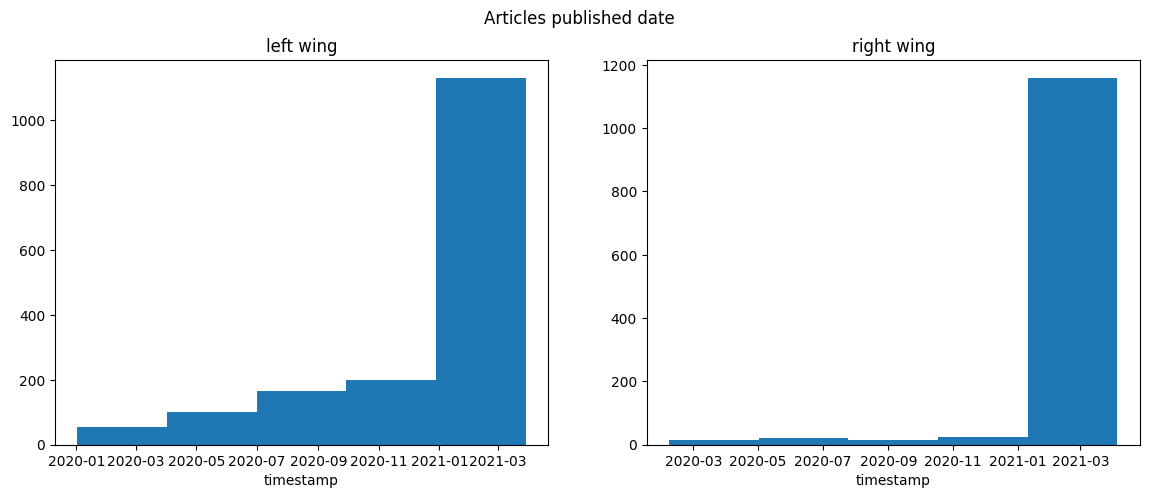

In [13]:
#check distribution of articles over time
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
f.suptitle('Articles published date') 

ax1.hist(brainded_left['pdate'],bins=5)
ax1.set_title('left wing')
ax1.set_xlabel('timestamp')

ax2.hist(brainded_right['pdate'],bins=5)
ax2.set_title('right wing')
ax2.set_xlabel('timestamp')

In [16]:
#check variety of news sources in each dataset
urls_right = [urlparse(brainded_right.link[row]).netloc for row in range(len(brainded_right.link))]
brainded_right['urls'] = urls_right

urls_left = [urlparse(brainded_left.link[row]).netloc for row in range(len(brainded_left.link))]
brainded_left['urls'] = urls_left

# number of news sources
print(f'left-wing news sources: {brainded_left.urls.nunique()}')
print(f'right-wing news sources: {brainded_right.urls.nunique()}')

left-wing news sources: 245
right-wing news sources: 48


In [18]:
# checking articles length

length_right = []
for i in range(len(brainded_right)):
    length_right.append(len(brainded_right.text[i].split()))

max(length_right),min(length_right)

length_left = []
for i in range(len(brainded_left)):
    length_left.append(len(brainded_left.text[i].split()))

max(length_left),min(length_left)

(16338, 9)

Text(0.5, 1.0, 'right wing')

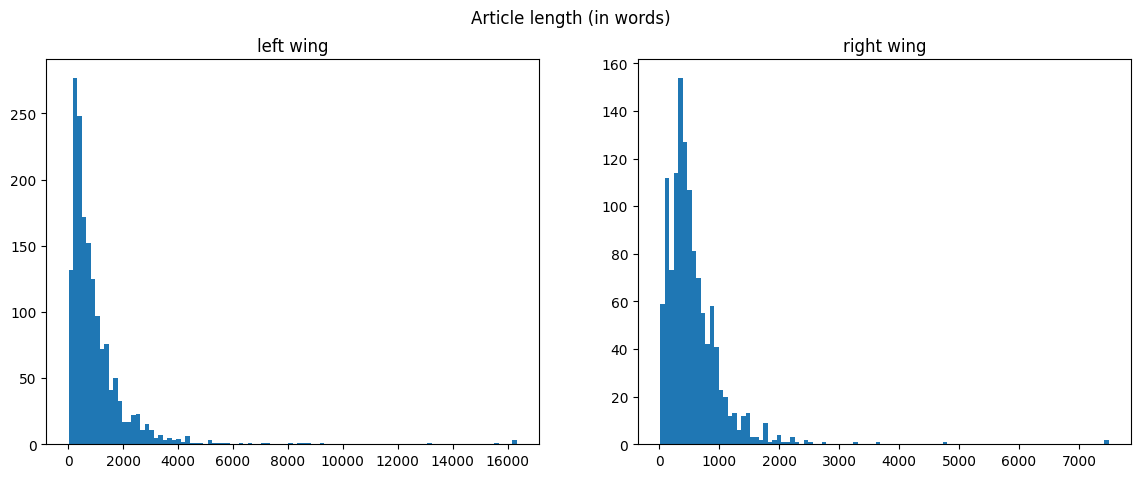

In [19]:
#check distribution of articles length
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
f.suptitle('Article length (in words)') 

ax1.hist(length_left,bins=100)
ax1.set_title('left wing')

ax2.hist(length_right,bins=100)
ax2.set_title('right wing')

In [24]:
brainded_left["pre_process_text"] = brainded_left['text']

In [35]:
i = 0
new_list = []
for text in brainded_left['pre_process_text']:
    new_list.append(brainded_left['pre_process_text'][i].lower())
    i += 1
new_list[22]

'the rumor appeared shortly after the new coronavirus struck china and spread almost as quickly: that the outbreak now afflicting people around the world had been manufactured by the chinese government.\n\nthe conspiracy theory lacks evidence and has been dismissed by scientists. but it has gained an audience with the help of well-connected critics of the chinese government such as stephen k. bannon, president trump’s former chief strategist. and on sunday, it got its biggest public boost yet.\n\nspeaking on fox news, senator tom cotton, republican of arkansas, raised the possibility that the virus had originated in a high-security biochemical lab in wuhan, the chinese city at the center of the outbreak.'

In [48]:
import string

In [49]:
second_list = []
for text in new_list:
    for special in string.punctuation:
        text = text.replace(special, ' ')
    text = text.replace('\n', ' ')
    second_list.append(text)


In [50]:
second_list[22]

'the rumor appeared shortly after the new coronavirus struck china and spread almost as quickly  that the outbreak now afflicting people around the world had been manufactured by the chinese government   the conspiracy theory lacks evidence and has been dismissed by scientists  but it has gained an audience with the help of well connected critics of the chinese government such as stephen k  bannon  president trump’s former chief strategist  and on sunday  it got its biggest public boost yet   speaking on fox news  senator tom cotton  republican of arkansas  raised the possibility that the virus had originated in a high security biochemical lab in wuhan  the chinese city at the center of the outbreak '

In [51]:
brainded_left["pre_process_text"] = second_list

In [52]:
brainded_left.head()

,level_0,index,Unnamed: 0,link,pdate,title,author,text,keywords,tags,compound,neg,neu,pos,polarity,subjectivity,time,urls,pre_process_text
0,0,1,1,https://www.alternet.org/2021/03/dan-crenshaw/,2021-03-22,Republican Dan Crenshaw goes down in flames du...,"['Sarah K. Burris', 'Raw Story']",MSNBC host Mehdi Hasan went after Rep. Dan Cre...,"['come', 'didnt', 'going', 'fox', 'biden', 'cr...",{'Religious right'},0.6474,0.055,0.876,0.069,-0.034989,0.411162,10:17:36+00:00,www.alternet.org,msnbc host mehdi hasan went after rep dan cre...
1,1,2,2,https://www.alternet.org/2021/03/rep-dan-crens...,2021-03-09,Rep. Dan Crenshaw purchased stock during pande...,['Meaghan Ellis'],Rep. Dan Crenshaw's (R-Texas) stock purchase h...,"['purchased', 'transactions', 'law', 'pandemic...",{'Religious right'},-0.8949,0.082,0.860,0.058,0.011441,0.323766,13:32:36+00:00,www.alternet.org,rep dan crenshaw s r texas stock purchase h...
2,2,3,3,https://www.alternet.org/2020/11/dan-crenshaw/,2020-11-23,Sen. Ed Markey applauded for silent dismissal ...,"['Walter Einenkel', 'Daily Kos']",Sen. Ed Markey is the Massachusetts Democrat w...,"['district', 'lame', 'markey', 'office', 'rep'...",{'Religious right'},0.9289,0.071,0.811,0.118,0.081250,0.439912,12:14:56+00:00,www.alternet.org,sen ed markey is the massachusetts democrat w...
3,3,7,7,https://www.alternet.org/2021/03/texas-storm-2...,2021-03-21,Paperwork failures worsened Texas blackouts — ...,"['Erin Douglas', 'The Texas Tribune']","On Valentine's Day, the major utility that sup...","['failures', 'scramble', 'energy', 'midstorm',...",{'Religious right'},0.9890,0.047,0.884,0.069,0.029100,0.447278,16:59:37+00:00,www.alternet.org,on valentine s day the major utility that sup...
4,4,8,8,https://www.texastribune.org/2021/03/18/texas-...,2021-03-18,"Paperwork failures worsened Texas blackouts, s...","['Erin Douglas', 'March', 'Pm Central', 'Updat...","On Valentine’s Day, the major utility that sup...","['failures', 'scramble', 'energy', 'midstorm',...",set(),0.9903,0.045,0.885,0.070,0.029100,0.447278,00:00:00,www.texastribune.org,on valentine’s day the major utility that sup...


In [55]:
mask = brainded_left['text'] != None
mask

0       True
1       True
2       True
3       True
4       True
        ... 
1645    True
1646    True
1647    True
1648    True
1649    True
Name: text, Length: 1650, dtype: bool

In [56]:
brainded_left = brainded_left[mask]

In [58]:
brainded_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           1650 non-null   int64         
 1   index             1650 non-null   int64         
 2   Unnamed: 0        1650 non-null   int64         
 3   link              1650 non-null   object        
 4   pdate             1650 non-null   datetime64[ns]
 5   title             1650 non-null   object        
 6   author            1650 non-null   object        
 7   text              1650 non-null   object        
 8   keywords          1650 non-null   object        
 9   tags              1650 non-null   object        
 10  compound          1650 non-null   float64       
 11  neg               1650 non-null   float64       
 12  neu               1650 non-null   float64       
 13  pos               1650 non-null   float64       
 14  polarity          1650 n

In [64]:
brainded_left["pre_process_text"]

0       msnbc host mehdi hasan went after rep  dan cre...
1       rep  dan crenshaw s  r texas  stock purchase h...
2       sen  ed markey is the massachusetts democrat w...
3       on valentine s day  the major utility that sup...
4       on valentine’s day  the major utility that sup...
                              ...                        
1645    our country is experiencing a moment of honest...
1646    editor’s note  the nation believes that helpin...
1647    “if you had only 48 hours of breath left  what...
1648    bernie’s out  senator sanders suspended his ca...
1649    elizabeth warren or bernie sanders  plenty of ...
Name: pre_process_text, Length: 1650, dtype: object

In [63]:
list_3 = []
for text in brainded_left["pre_process_text"]:
    list_3.append(string(text))
list_3

TypeError: 'module' object is not callable